<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-52/blob/main/Reto%20-%20Entrega%202_prueba1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **Reto - Entrega 2**
>### **Maestría en Inteligencia Artificial Aplicada**
>### **Curso: Inteligencia Artificial y Aprendizaje Automático**
>### **Tecnológico de Monterrey**
>### **Prof: María de la Paz Rico Fernández**

### **Genaro Ramos Higuera - A00351269**
### **Gerardo Aaron Castañeda Jaramillo - A01137646**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import get_scorer
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay, precision_recall_curve, roc_curve

# **AGUAS SUBTERRANEAS**

In [ ]:
url = 'https://github.com/PosgradoMNA/actividades-del-projecto-equipo-52/blob/main/aguas_subterraneas.csv?raw=true'

data_asb = pd.read_csv(url,sep=",")
print(data_asb.shape)
data_asb.head()

(1054, 34)


,CLAVE,LONGITUD,LATITUD,ORGANISMO_DE_CUENCA,SUBTIPO,ALC_mg/L,COND_mS/cm,SDT_M_mg/L,FLUO_mg/L,DUR_mg/L,...,CALIDAD_CF,CALIDAD_NNO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE,SEMAFORO
0,DLAGU6,-102.02210,22.20887,6.0,5.0,229.990,940.0,603.6,0.9766,213.7320,...,1,1,2,1,1,1,1,1,1,1
1,DLAGU6516,-102.20075,21.99958,6.0,5.0,231.990,608.0,445.4,0.9298,185.0514,...,1,2,2,1,1,1,1,1,1,1
2,DLAGU7,-102.28801,22.36685,6.0,5.0,204.920,532.0,342.0,1.8045,120.7190,...,1,1,3,1,1,1,1,1,1,3
3,DLAGU9,-102.29449,22.18435,6.0,5.0,327.000,686.0,478.6,1.1229,199.8790,...,1,1,2,1,1,1,1,1,1,1
4,DLBAJ107,-110.24480,23.45138,10.0,5.0,309.885,1841.0,1179.0,0.2343,476.9872,...,3,3,1,1,1,1,1,1,1,3


### **Selecciona tus variables independientes X y dependiente Y (semáforo)**

Separamos las columnas en base a su tipo de variable:

In [ ]:
#definimos variables numéricas #16
num_nom_geo = ['LONGITUD','LATITUD']
num_nom_cal = ['ALC_mg/L','COND_mS/cm','SDT_M_mg/L','FLUO_mg/L','DUR_mg/L','CF_NMP/100_mL','NNO3_mg/L','AS_TOT_mg/L', 'CD_TOT_mg/L','CR_TOT_mg/L',
               'HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
#definimos variables categóricas #16
cat_nom = ['ORGANISMO_DE_CUENCA','SUBTIPO']
cat_nom_cal = ['CALIDAD_ALC','CALIDAD_COND','CALIDAD_SDT','CALIDAD_FLUO','CALIDAD_DUR', 'CALIDAD_CF','CALIDAD_NNO3','CALIDAD_AS',
               'CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE']
#VARIABLE CATEGORICA DE SALIDA Y  #1
y_nom = ['SEMAFORO']

Generamos los datos en Y, y dos tipos de X. Una donde se utilizarán los datos numéricos de calidad, y otra donde se utilizarán los datos categóricos de calidad. Utilizar las variables numéricas y categorías de calidad, donde las categóricas son dependientes de las numéricas, puede afectar la correlación entre variables y eventualmente el modelo.

In [ ]:
Y = data_asb[['SEMAFORO']]

X_num = data_asb[num_nom_geo + cat_nom + num_nom_cal]
X_cat = data_asb[num_nom_geo + cat_nom + cat_nom_cal]

### **Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]**

Previamente en la parte 1 del reto ya se cambiaron los valores del semáforo a 1:verde, 2:amarillo, 3:rojo

In [ ]:
Y.value_counts()

SEMAFORO
1           427
3           382
2           245
dtype: int64

### **Realiza un análisis general de las features importances a traves de decision trees o random forest.**

Definimos modelos a usar:

In [ ]:
def get_models():
  modelos = list()
  nombres = list()

  modelos.append(DecisionTreeClassifier())
  nombres.append('DTC')
  
  modelos.append(RandomForestClassifier())
  nombres.append('RFC')
  
  return modelos, nombres

Obtenemos los feature importance con variables de calidad numéricas:

DTC
LONGITUD: 0.0
LATITUD: 0.007
ORGANISMO_DE_CUENCA: 0.0
SUBTIPO: 0.0
ALC_mg/L: 0.03
COND_mS/cm: 0.058
SDT_M_mg/L: 0.005
FLUO_mg/L: 0.204
DUR_mg/L: 0.152
CF_NMP/100_mL: 0.081
NNO3_mg/L: 0.099
AS_TOT_mg/L: 0.116
CD_TOT_mg/L: 0.0
CR_TOT_mg/L: 0.017
HG_TOT_mg/L: 0.002
PB_TOT_mg/L: 0.014
MN_TOT_mg/L: 0.052
FE_TOT_mg/L: 0.079


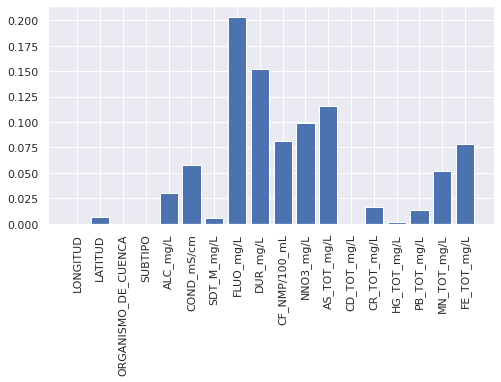

RFC
LONGITUD: 0.0
LATITUD: 0.002
ORGANISMO_DE_CUENCA: 0.0
SUBTIPO: 0.0
ALC_mg/L: 0.026
COND_mS/cm: 0.006
SDT_M_mg/L: 0.006
FLUO_mg/L: 0.192
DUR_mg/L: 0.135
CF_NMP/100_mL: 0.071
NNO3_mg/L: 0.094
AS_TOT_mg/L: 0.112
CD_TOT_mg/L: 0.0
CR_TOT_mg/L: 0.009
HG_TOT_mg/L: 0.0
PB_TOT_mg/L: 0.004
MN_TOT_mg/L: 0.051
FE_TOT_mg/L: 0.075


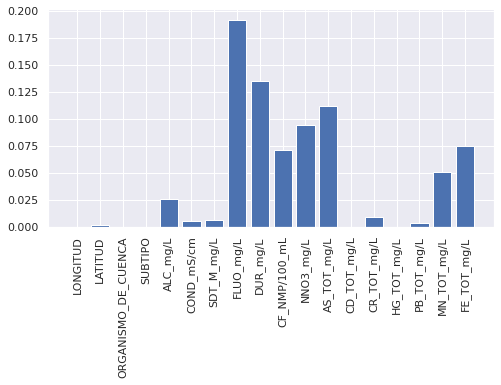

In [ ]:
modelos, nombres = get_models()

for m in range(len(modelos)):
  modelos[m].fit(X_num, np.ravel(Y))
  importance = permutation_importance(modelos[m], X_num, Y, n_repeats=10)
  print('\033[1m' + nombres[m] + '\033[0m')
  for i,v in enumerate(importance['importances_mean']):
    print(X_num.columns[i]+':', v.round(3))
  f = plt.figure()
  plt.bar(X_num.columns, importance['importances_mean'])
  plt.xticks(rotation='vertical')
  plt.show() 

Obtenemos los feature importance con las variables de calidad categóricas:

DTC
LONGITUD: 0.0
LATITUD: 0.006
ORGANISMO_DE_CUENCA: 0.002
SUBTIPO: 0.0
CALIDAD_ALC: 0.031
CALIDAD_COND: 0.061
CALIDAD_SDT: 0.01
CALIDAD_FLUO: 0.204
CALIDAD_DUR: 0.156
CALIDAD_CF: 0.08
CALIDAD_NNO3: 0.1
CALIDAD_AS: 0.115
CALIDAD_CD: 0.0
CALIDAD_CR: 0.021
CALIDAD_HG: 0.0
CALIDAD_PB: 0.013
CALIDAD_MN: 0.055
CALIDAD_FE: 0.078


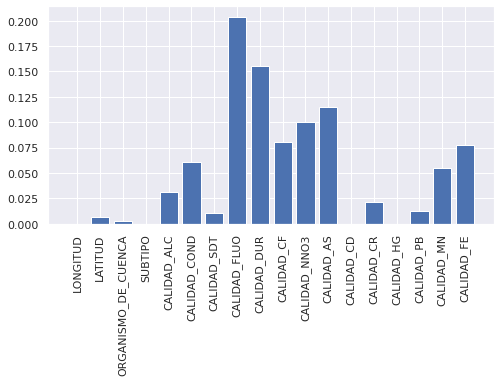

RFC
LONGITUD: 0.001
LATITUD: 0.003
ORGANISMO_DE_CUENCA: 0.0
SUBTIPO: 0.0
CALIDAD_ALC: 0.021
CALIDAD_COND: 0.012
CALIDAD_SDT: 0.01
CALIDAD_FLUO: 0.201
CALIDAD_DUR: 0.142
CALIDAD_CF: 0.078
CALIDAD_NNO3: 0.099
CALIDAD_AS: 0.112
CALIDAD_CD: 0.0
CALIDAD_CR: 0.013
CALIDAD_HG: 0.0
CALIDAD_PB: 0.01
CALIDAD_MN: 0.053
CALIDAD_FE: 0.074


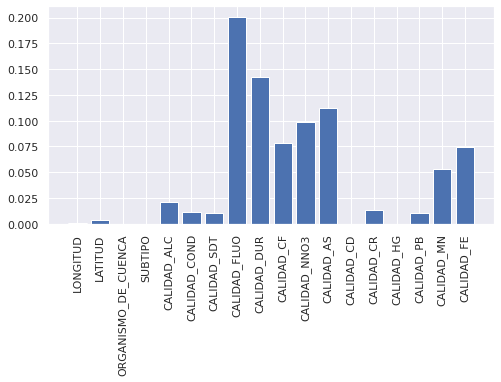

In [ ]:
modelos, nombres = get_models()

for m in range(len(modelos)):
  modelos[m].fit(X_cat, np.ravel(Y))
  importance = permutation_importance(modelos[m], X_cat, Y, n_repeats=10)
  print('\033[1m' + nombres[m] + '\033[0m')
  for i,v in enumerate(importance['importances_mean']):
    print(X_cat.columns[i]+':', v.round(3))
  f = plt.figure()
  plt.bar(X_cat.columns, importance['importances_mean'])
  plt.xticks(rotation='vertical')
  plt.show() 

Y donde observamos que las variables de ubicación geográfica, así como organismo de cuenca y subtipo no tienen ninguna importancia significativa. Mientras que las de calidad, con algunas excepciones como las de CD y HG, son las que tienen mayor importancia.

### **Selecciona las variables de mayor importancia.**

Removemos de nuestras listas de columnas las variables que no tienen feature importance

In [ ]:
num_nom_cal.remove('CD_TOT_mg/L')
num_nom_cal.remove('HG_TOT_mg/L')
cat_nom_cal.remove('CALIDAD_CD')
cat_nom_cal.remove('CALIDAD_HG')

Observamos con cuales nos quedamos:

In [ ]:
print(num_nom_cal)
print(cat_nom_cal)

['ALC_mg/L', 'COND_mS/cm', 'SDT_M_mg/L', 'FLUO_mg/L', 'DUR_mg/L', 'CF_NMP/100_mL', 'NNO3_mg/L', 'AS_TOT_mg/L', 'CR_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']
['CALIDAD_ALC', 'CALIDAD_COND', 'CALIDAD_SDT', 'CALIDAD_FLUO', 'CALIDAD_DUR', 'CALIDAD_CF', 'CALIDAD_NNO3', 'CALIDAD_AS', 'CALIDAD_CR', 'CALIDAD_PB', 'CALIDAD_MN', 'CALIDAD_FE']


Generamos nuevas dataframes con las columnas a utilizar:

In [ ]:
X_num = data_asb[num_nom_cal]
X_cat = data_asb[cat_nom_cal]

### **Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)**

* Comenzamos con variables numéricas:

In [ ]:
score_list = list()
grid_splits = list()

In [ ]:
def get_scores(yreal, ypred, model, aver='micro'):
  temp_list = list()

  temp_list.append(model)
  accu = accuracy_score(yreal,ypred)
  f1 = f1_score(yreal,ypred,average=aver)
  precision = precision_score(yreal,ypred,average=aver)
  recall = recall_score(yreal,ypred,average=aver)

  temp_list.append(accu)
  temp_list.append(f1)
  temp_list.append(precision)
  temp_list.append(recall)
  print('Accuracy:', accu)
  print('f1_score:', f1)
  print('Precision:', precision)
  print('Recall:', recall)

  return temp_list

Sabemos de la parte 1 que las clases de salida tienen diferentes proporciones, por lo que utilizamos el parámetro stratify:

In [ ]:
Xtv_num, Xtest_num, ytv_num, ytest_num = train_test_split(X_num, Y, test_size=0.15, stratify=Y, random_state=0) 
print(Xtv_num.shape, ': dimensión de datos de entrada de entrenamiento y validación')
print(Xtest_num.shape, ': dimensión de datos de entrada de prueba')  
print(ytv_num.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest_num.shape, ': dimensión de variable de salida para prueba')

(895, 12) : dimensión de datos de entrada de entrenamiento y validación
(159, 12) : dimensión de datos de entrada de prueba
(895, 1) : dimensión de variable de salida para entrenamiento y validación
(159, 1) : dimensión de variable de salida para prueba


* Decision Tree variables numéricas de calidad de entrada:

Comenzamos viendo la curva de aprendizaje para el parámetro de max_depth:

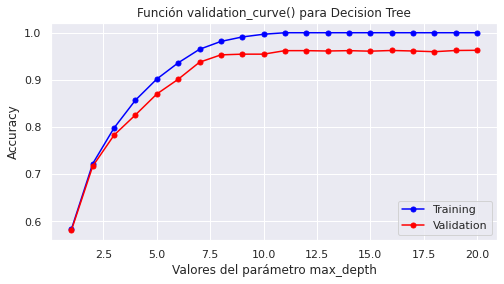

In [ ]:
#obtenemos el modelo y los parametros de cross validation
modeloVC = DecisionTreeClassifier()
cvVC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

delta_max_depth = np.linspace(1, 20, 20)

train_scores, valid_scores = validation_curve(modeloVC, 
                                              Xtv_num, 
                                              np.ravel(ytv_num), 
                                              param_name="max_depth", 
                                              param_range=delta_max_depth,
                                              cv=cvVC,
                                              scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_max_depth, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_max_depth, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve() para Decision Tree')
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('Accuracy')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

Y observamos que después de max_depth 10 ya no existen cambios significativos para las curvas de training o validación, asi que nos quedamos con un máximo de 10 para el gridsearch para este parámetro:

In [ ]:
#obtenemos el modelo y los parámetros
modeloDTC_iter = DecisionTreeClassifier()
cvSVM = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

dicc_grid = [{'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100],'criterion':['gini','entropy'],
             'max_depth':[1,2,3,4,5,6,7,8,9,10],'min_samples_split':[2,3,4,5,6],'class_weight':['balanced', None]}]

grid1 = GridSearchCV(estimator=modeloDTC_iter, 
                    param_grid=dicc_grid, 
                    cv=cvSVM, 
                    scoring='accuracy',
                    n_jobs=-1,
                    error_score='raise')

Corremos el grid search:

In [ ]:
grid1.fit(Xtv_num, np.ravel(ytv_num))

print('Mejor valor de accuracy obtenido con la mejor combinación:', grid1.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid1.best_params_)
print('Métrica utilizada:', grid1.scoring)
print('Mejor Index:',grid1.best_index_)

grid_splits.append(grid1) 

Mejor valor de accuracy obtenido con la mejor combinación: 0.9582867783985101
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0001, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4}
Métrica utilizada: accuracy
Mejor Index: 147


Observamos un accuracy del 95.82% máximo con los hiper parámetros. Ahora probamos el modelo con sus hiper parámetros para los datos de prueba:

In [ ]:
model_DTC_num = DecisionTreeClassifier(**grid1.best_params_)

model_DTC_num.fit(Xtv_num, ytv_num)
#realizamos las predicciones
yhat_num = model_DTC_num.predict(Xtest_num)

score_list.append(get_scores(ytest_num,yhat_num, 'DTC num'))

Accuracy: 0.949685534591195
f1_score: 0.949685534591195
Precision: 0.949685534591195
Recall: 0.949685534591195


Donde observamos que accuracy disminuye cerca de 1%. Lo que sugiere un muy mínimo sobreentrenamiento. Es un valor muy aceptable.

* Random Forest variables numéricas de calidad de entrada:

Comenzamos viendo la curva de aprendizaje para el parámetro de max_depth:

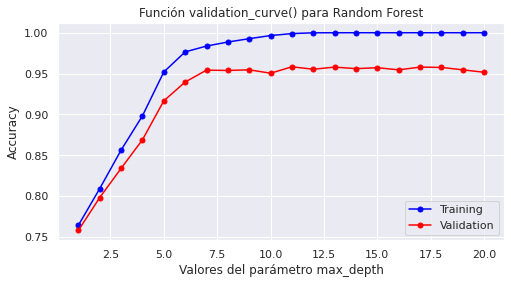

In [ ]:
#obtenemos el modelo y los parametros de cross validation
modeloVC = RandomForestClassifier()
cvVC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

delta_max_depth = np.linspace(1, 20, 20)

train_scores, valid_scores = validation_curve(modeloVC, 
                                              Xtv_num, 
                                              np.ravel(ytv_num), 
                                              param_name="max_depth", 
                                              param_range=delta_max_depth,
                                              cv=cvVC,
                                              scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_max_depth, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_max_depth, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve() para Random Forest')
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('Accuracy')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

Y observamos que después de max_depth 10 ya no existen cambios significativos para las curvas de training o validación, así como que previo a 4 la métrica de accuracy aún sigue pudiendo subir. Por lo que nos quedamos con un mínimo de 4 y un máximo de 10 para el gridsearch de este parámetro:

In [ ]:
#obtenemos el modelo y los parámetros
modeloRFC_iter = RandomForestClassifier()
cvSVM = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

dicc_grid = [{'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100],'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10],'min_samples_split':[2,3,4,5,6],'class_weight':['balanced', None]}]

grid2 = GridSearchCV(estimator=modeloDTC_iter, 
                    param_grid=dicc_grid, 
                    cv=cvSVM, 
                    scoring='accuracy',
                    n_jobs=-1,
                    error_score='raise')

Corremos el grid search:

In [ ]:
grid2.fit(Xtv_num, np.ravel(ytv_num))

print('Mejor valor de accuracy obtenido con la mejor combinación:', grid2.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid2.best_params_)
print('Métrica utilizada:', grid2.scoring)
print('Mejor Index:',grid2.best_index_)

grid_splits.append(grid2)

Mejor valor de accuracy obtenido con la mejor combinación: 0.9564245810055865
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0001, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 3}
Métrica utilizada: accuracy
Mejor Index: 101


Observamos un accuracy del 95.64% máximo con los hiper parámetros. Ahora probamos el modelo con sus hiper parámetros para los datos de prueba:

In [ ]:
model_RFC_num = RandomForestClassifier(**grid2.best_params_)

model_RFC_num.fit(Xtv_num, np.ravel(ytv_num))
yhat_num = model_RFC_num.predict(Xtest_num)

score_list.append(get_scores(ytest_num,yhat_num, 'RFC num'))

Accuracy: 0.9811320754716981
f1_score: 0.9811320754716981
Precision: 0.9811320754716981
Recall: 0.9811320754716981


Donde observamos que accuracy aumenta cerca de 1.5%. Lo cual es muy buena indicación de que está generalizando correctamente.

* Comenzamos con variables categóricas:

Particionamos los datos:

In [ ]:
Xtv_cat, Xtest_cat, ytv_cat, ytest_cat = train_test_split(X_cat, Y, test_size=0.15, stratify=Y, random_state=0) 
print(Xtv_cat.shape, ': dimensión de datos de entrada de entrenamiento y validación')
print(Xtest_cat.shape, ': dimensión de datos de entrada de prueba')  
print(ytv_cat.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest_cat.shape, ': dimensión de variable de salida para prueba')

(895, 12) : dimensión de datos de entrada de entrenamiento y validación
(159, 12) : dimensión de datos de entrada de prueba
(895, 1) : dimensión de variable de salida para entrenamiento y validación
(159, 1) : dimensión de variable de salida para prueba


* Decision Tree variables categóricas de calidad de entrada:

Comenzamos viendo la curva de aprendizaje para el parámetro de max_depth:

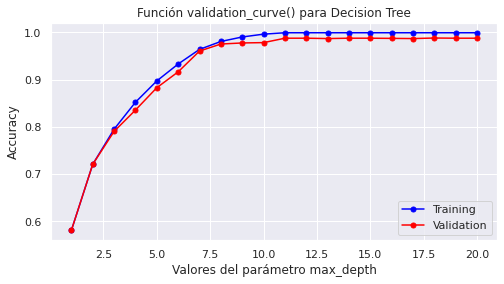

In [ ]:
#obtenemos el modelo y los parametros de cross validation
modeloVC = DecisionTreeClassifier()
cvVC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

delta_max_depth = np.linspace(1, 20, 20)

train_scores, valid_scores = validation_curve(modeloVC, 
                                              Xtv_cat, 
                                              np.ravel(ytv_cat), 
                                              param_name="max_depth", 
                                              param_range=delta_max_depth,
                                              cv=cvVC,
                                              scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_max_depth, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_max_depth, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve() para Decision Tree')
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('Accuracy')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

Y observamos que después de max_depth 10 ya no existen cambios significativos para las curvas de training o validación, asi que nos quedamos con un máximo de 10 para el gridsearch para este parámetro:

In [ ]:
#obtenemos el modelo y los parámetros
modeloDTC_iter = DecisionTreeClassifier()
cvSVM = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

dicc_grid = [{'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100],'criterion':['gini','entropy'],
             'max_depth':[1,2,3,4,5,6,7,8,9,10],'min_samples_split':[2,3,4,5,6],'class_weight':['balanced', None]}]

grid3 = GridSearchCV(estimator=modeloDTC_iter, 
                    param_grid=dicc_grid, 
                    cv=cvSVM, 
                    scoring='accuracy',
                    n_jobs=-1,
                    error_score='raise')

Corremos el grid search:

In [ ]:
grid3.fit(Xtv_cat, np.ravel(ytv_cat))

print('Mejor valor de accuracy obtenido con la mejor combinación:', grid3.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid3.best_params_)
print('Métrica utilizada:', grid3.scoring)
print('Mejor Index:',grid3.best_index_)

grid_splits.append(grid3)

Mejor valor de accuracy obtenido con la mejor combinación: 0.9802607076350093
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0001, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3}
Métrica utilizada: accuracy
Mejor Index: 196


Observamos un accuracy del 98.03% máximo con los hiper parámetros. Ahora probamos el modelo con sus hiper parámetros para los datos de prueba:

In [ ]:
model_DTC_cat = DecisionTreeClassifier(**grid3.best_params_)

model_DTC_cat.fit(Xtv_cat, np.ravel(ytv_cat))
yhat_cat = model_DTC_cat.predict(Xtest_cat)

score_list.append(get_scores(ytest_cat,yhat_cat, 'DTC cat'))

Accuracy: 0.9937106918238994
f1_score: 0.9937106918238994
Precision: 0.9937106918238994
Recall: 0.9937106918238994


Donde observamos que accuracy incrementa a 99.4%. Lo cual es muy buena indicación de que está generalizando correctamente.

* Random Forest variables categóricas de calidad de entrada:

Comenzamos viendo la curva de aprendizaje para el parámetro de max_depth:

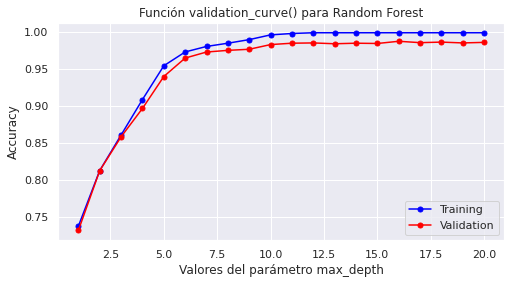

In [ ]:
#obtenemos el modelo y los parametros de cross validation
modeloVC = RandomForestClassifier()
cvVC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

delta_max_depth = np.linspace(1, 20, 20)

train_scores, valid_scores = validation_curve(modeloVC, 
                                              Xtv_cat, 
                                              np.ravel(ytv_cat), 
                                              param_name="max_depth", 
                                              param_range=delta_max_depth,
                                              cv=cvVC,
                                              scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_max_depth, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_max_depth, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve() para Random Forest')
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('Accuracy')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

Y observamos que después de max_depth 10 ya no existen cambios significativos para las curvas de training o validación, así como que previo a 4 la métrica de accuracy aún sigue pudiendo subir. Por lo que nos quedamos con un mínimo de 4 y un máximo de 10 para el gridsearch de este parámetro:

In [ ]:
#obtenemos el modelo y los parámetros
modeloRFC_iter = RandomForestClassifier()
cvSVM = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

dicc_grid = [{'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100],'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10],'min_samples_split':[2,3,4,5,6],'class_weight':['balanced', None]}]

grid4 = GridSearchCV(estimator=modeloDTC_iter, 
                    param_grid=dicc_grid, 
                    cv=cvSVM, 
                    scoring='accuracy',
                    n_jobs=-1,
                    error_score='raise')

Corremos el grid search:

In [ ]:
grid4.fit(Xtv_cat, np.ravel(ytv_cat))

print('Mejor valor de accuracy obtenido con la mejor combinación:', grid4.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid4.best_params_)
print('Métrica utilizada:', grid4.scoring)
print('Mejor Index:',grid4.best_index_)

grid_splits.append(grid4)

Mejor valor de accuracy obtenido con la mejor combinación: 0.980633147113594
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0001, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4}
Métrica utilizada: accuracy
Mejor Index: 137


Observamos un accuracy del 98.06% máximo con los hiper parámetros. Ahora probamos el modelo con sus hiper parámetros para los datos de prueba:

In [ ]:
model_RFC_cat = RandomForestClassifier(**grid4.best_params_)

model_RFC_cat.fit(Xtv_cat, np.ravel(ytv_cat))
#realizamos las predicciones
yhat_cat = model_RFC_cat.predict(Xtest_cat)

score_list.append(get_scores(ytest_cat,yhat_cat, 'RFC cat'))

Accuracy: 1.0
f1_score: 1.0
Precision: 1.0
Recall: 1.0


Donde observamos que accuracy incrementa a 100%. Lo cual es muy buena indicación de que está generalizando perfectamente.

### **Explora que clasificador es el más optimo, ejemplo:**

Obtenemos los resultados de cada split del cross validation hecho en cada gridsearch:

In [ ]:
tot_resultados_cv = list()
for grid in grid_splits:
  indx = grid.best_index_
  resultados_cv = list()
  for i in range(15):
    resultados_cv.append(grid.cv_results_['split' + str(i) + '_test_score'][indx])
  tot_resultados_cv.append(resultados_cv)

Generamos una lista con los nombres de cada modelo:

In [ ]:
scores = list()
for scor in score_list:
  scores.append(scor[0])

Visualizamos en boxplots la distribución de los resultados de accuracy para cada modelo:

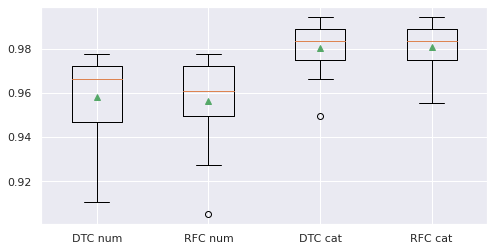

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
plt.boxplot(tot_resultados_cv, labels=scores, showmeans=True)
plt.show()

Donde observamos que los resultados con menos varianza para cada split, son los de los modelos categóricos. Así mismo, el promedio más alto es también para los categóricos. Por lo que nos quedamos con el modelo de Random Forest con variables categóricas de calidad, ya que entre los dos modelos con variables categóricas, es el que arroja mejores resultados para los datos de prueba:

In [ ]:
best_RFC_model = RandomForestClassifier(**grid4.best_params_)

best_RFC_model.fit(Xtv_cat, np.ravel(ytv_cat))
yhat = best_RFC_model.predict(Xtest_cat)

print('Accuracy:',accuracy_score(ytest_cat,yhat))
print('F1-score:',f1_score(ytest_cat,yhat,average='micro'))
print('Precision:',precision_score(ytest_cat,yhat,average='micro'))
print('Recall:',recall_score(ytest_cat,yhat,average='micro'))

Accuracy: 1.0
F1-score: 1.0
Precision: 1.0
Recall: 1.0


Un 100% en todas las métricas.

### **Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.**

* Reporte de clasificacion:

In [ ]:
target_names = ['Verde', 'Amarillo', 'Rojo']
print(classification_report(ytest_cat, yhat, target_names=target_names))

              precision    recall  f1-score   support

       Verde       1.00      1.00      1.00        64
    Amarillo       1.00      1.00      1.00        37
        Rojo       1.00      1.00      1.00        58

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159



Validamos que tenemos un 100% de exactitud

* Grafica de Precision-Recall

Aplicamos one-hot encoder a los datos de Y de prueba, así como a las predicciones. Ya que es necesario hacer una curva para cada clase

In [ ]:
Y_ohe = OneHotEncoder()
Y_fitted = Y_ohe.fit(Y)
y_test_multicolum = Y_fitted.transform(ytest_cat).toarray()
y_hat_multicolum = Y_fitted.transform(pd.DataFrame(yhat,columns=['SEMAFORO'])).toarray()

Generamos las curvas de precision vs. recall de cada clase:

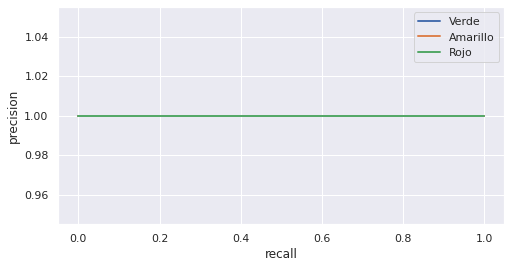

In [ ]:
precision = dict()
recall = dict()
clases = ['Verde','Amarillo','Rojo']
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test_multicolum[:, i],
                                                        y_hat_multicolum[:, i])
    plt.plot(recall[i], precision[i], lw=2, label=clases[i])
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.show()

Observamos una exactitud del 100% para cada clase con los datos de prueba.

Generamos como complemento una curva de ROC para cada clase:

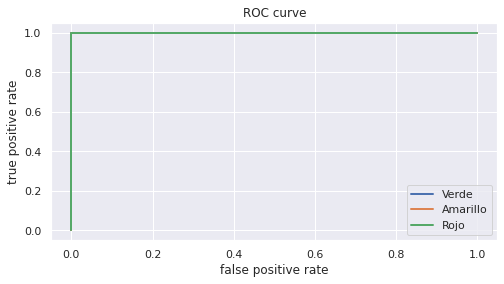

In [ ]:
fpr = dict()
tpr = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_multicolum[:, i],
                                  y_hat_multicolum[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label=clases[i])

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

Donde igual obtenemos un 100% de area bajo la curva.

### **Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.**

Generamos la matriz de confusión:

In [ ]:
cm = confusion_matrix(ytest_cat, yhat)

La visualizamos:

[Text(21.499999999999996, 0.5, 'Etiquetas Reales'),
 Text(0.5, 21.5, 'Etiquetas de Predicción')]

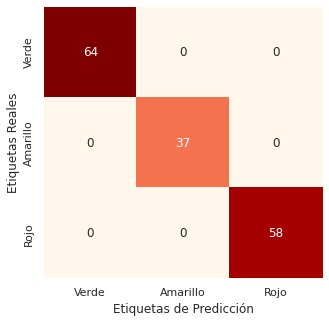

In [ ]:
df_cm = pd.DataFrame(cm, index = ['Verde','Amarillo','Rojo'], columns = ['Verde','Amarillo','Rojo'])
plt.figure(figsize = (5,5))
ax = sns.heatmap(df_cm, annot=True, cmap='OrRd', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")

Y encontramos que el modelo consiguió predecir con un 100% de exactitud los datos de prueba. Lo cual nos dice que nuestro modelo generaliza y predice correctamente.

# **AGUAS SUPERFICIALES**

In [2]:
url = 'https://github.com/PosgradoMNA/actividades-del-projecto-equipo-52/blob/main/aguas_superficiales.csv?raw=true'

data_asp = pd.read_csv(url,sep=",")
print(data_asp.shape)
data_asp.head()

(3479, 35)


,CLAVE,LONGITUD,LATITUD,ORGANISMO_DE_CUENCA,SUBTIPO,GRUPO,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,...,CALIDAD_ENTEROC,CALIDAD_OD_PORC,CALIDAD_OD_PORC_SUP,CALIDAD_OD_PORC_MED,CALIDAD_OD_PORC_FON,CALIDAD_TOX_D_48,CALIDAD_TOX_V_15,CALIDAD TOX_D_48_SUP,CALIDAD_TOX_FIS_SUP_15,SEMAFORO
0,DLAGU8,-102.33911,22.24730,6.0,22.0,1.0,1.024631,1.138962,1.003678,1.000431,...,0,0,3,0,0,0,0,1,1,3
1,DLBAJ100,-109.84290,22.90473,10.0,21.0,0.0,1.000000,1.000000,1.000000,1.000000,...,1,0,1,1,1,0,0,0,1,1
2,DLBAJ101,-109.86442,22.89880,10.0,21.0,0.0,1.000000,1.000000,1.000000,1.000000,...,1,0,1,1,1,0,0,0,1,1
3,DLBAJ102,-109.88604,22.89609,10.0,2.0,0.0,1.000000,1.000000,1.003885,1.000000,...,1,0,0,0,1,0,0,0,1,1
4,DLBAJ103,-109.89657,22.87694,10.0,2.0,0.0,1.000000,1.000000,1.000000,1.000000,...,1,0,1,1,1,0,0,0,1,1


### **Selecciona tus variables independientes X y dependiente Y (semáforo)**

Separamos las columnas en base a su tipo de variable:

In [3]:
#definimos variables numéricas
num_nom_geo = ['LONGITUD','LATITUD']
num_nom_cal = ['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP',
              'OD_PORC_MED','OD_PORC_FON','TOX_D_48_UT','TOX_V_15_UT','TOX_D_48_SUP_UT','TOX_FIS_SUP_15_UT']

#definimos variables categóricas
cat_nom = ['ORGANISMO_DE_CUENCA','SUBTIPO','GRUPO']
cat_nom_cal = ['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP',
               'CALIDAD_OD_PORC_MED','CALIDAD_OD_PORC_FON','CALIDAD_TOX_D_48','CALIDAD_TOX_V_15','CALIDAD TOX_D_48_SUP','CALIDAD_TOX_FIS_SUP_15']
#VARIABLE CATEGORICA DE SALIDA Y
y_nom = ['SEMAFORO']

Generamos los datos en Y, y dos tipos de X. Una donde se utilizarán los datos numéricos de calidad, y otra donde se utilizarán los datos categóricos de calidad. Utilizar las variables numéricas y categorías de calidad, donde las categóricas son dependientes de las numéricas, puede afectar la correlación entre variables y eventualmente el modelo.

In [4]:
Y = data_asp[['SEMAFORO']]

X_num = data_asp[num_nom_geo + cat_nom + num_nom_cal]
X_cat = data_asp[num_nom_geo + cat_nom + cat_nom_cal]

### **Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]**

Previamente en la parte 1 del reto ya se cambiaron los valores del semáforo a 1:verde, 2:amarillo, 3:rojo

In [5]:
Y.value_counts()

SEMAFORO
1           1259
2           1129
3           1091
dtype: int64

### **Realiza un análisis general de las features importances a traves de decision trees o random forest.**

Definimos modelos a usar:

In [6]:
def get_models():
  modelos = list()
  nombres = list()

  modelos.append(DecisionTreeClassifier())
  nombres.append('DTC')
  
  modelos.append(RandomForestClassifier())
  nombres.append('RFC')
  
  return modelos, nombres

Obtenemos los feature importance con variables de calidad numéricas:

DTC
LONGITUD: 0.001
LATITUD: 0.003
ORGANISMO_DE_CUENCA: 0.004
SUBTIPO: 0.0
GRUPO: 0.0
DBO_mg/L: 0.026
DQO_mg/L: 0.334
SST_mg/L: 0.045
COLI_FEC_NMP_100mL: 0.245
E_COLI_NMP_100mL: 0.12
ENTEROC_NMP_100mL: 0.06
OD_PORC: 0.028
OD_PORC_SUP: 0.05
OD_PORC_MED: 0.0
OD_PORC_FON: 0.02
TOX_D_48_UT: 0.0
TOX_V_15_UT: 0.0
TOX_D_48_SUP_UT: 0.001
TOX_FIS_SUP_15_UT: 0.0


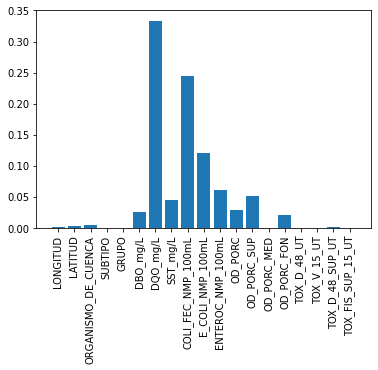

RFC
LONGITUD: 0.001
LATITUD: 0.001
ORGANISMO_DE_CUENCA: 0.001
SUBTIPO: 0.001
GRUPO: 0.001
DBO_mg/L: 0.002
DQO_mg/L: 0.354
SST_mg/L: 0.029
COLI_FEC_NMP_100mL: 0.27
E_COLI_NMP_100mL: 0.011
ENTEROC_NMP_100mL: 0.055
OD_PORC: 0.005
OD_PORC_SUP: 0.015
OD_PORC_MED: 0.001
OD_PORC_FON: 0.007
TOX_D_48_UT: 0.0
TOX_V_15_UT: 0.0
TOX_D_48_SUP_UT: 0.001
TOX_FIS_SUP_15_UT: 0.0


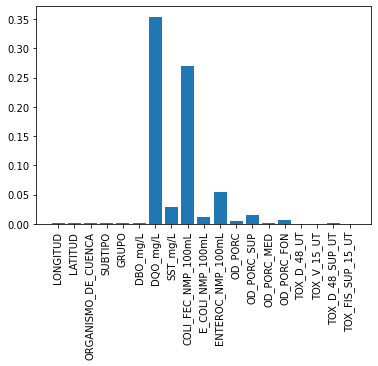

In [7]:
modelos, nombres = get_models()

for m in range(len(modelos)):
  modelos[m].fit(X_num, np.ravel(Y))
  importance = permutation_importance(modelos[m], X_num, Y, n_repeats=10)
  print('\033[1m' + nombres[m] + '\033[0m')
  for i,v in enumerate(importance['importances_mean']):
    print(X_num.columns[i]+':', v.round(3))
  f = plt.figure()
  plt.bar(X_num.columns, importance['importances_mean'])
  plt.xticks(rotation='vertical')
  plt.show() 

Y donde observamos que las variables de ubicación geográfica, así como organismo de cuenca, subtipo y grupo no tienen una importancia significativa. Mientras que las de calidad, son algunas las que dan la mayor importancia. Pero vemos que OD_PORC_MED, TOX_D_48_UT, TOX_V_15_UT, TOX_D_48_SUP_UT, y TOX_FIS_SUP_15_UT no tienen efecto alguno.

Obtenemos los feature importance con las variables de calidad categóricas:

DTC
LONGITUD: 0.0
LATITUD: 0.0
ORGANISMO_DE_CUENCA: 0.0
SUBTIPO: 0.0
GRUPO: 0.0
CALIDAD_DBO: 0.022
CALIDAD_DQO: 0.331
CALIDAD_SST: 0.044
CALIDAD_COLI_FEC: 0.253
CALIDAD_E_COLI: 0.119
CALIDAD_ENTEROC: 0.059
CALIDAD_OD_PORC: 0.035
CALIDAD_OD_PORC_SUP: 0.021
CALIDAD_OD_PORC_MED: 0.0
CALIDAD_OD_PORC_FON: 0.027
CALIDAD_TOX_D_48: 0.0
CALIDAD_TOX_V_15: 0.0
CALIDAD TOX_D_48_SUP: 0.001
CALIDAD_TOX_FIS_SUP_15: 0.001


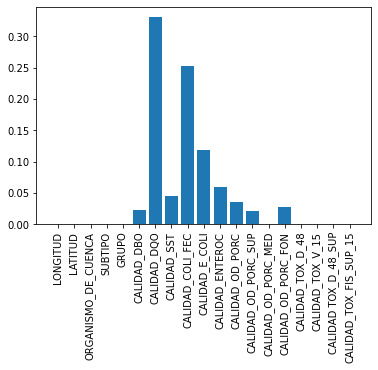

RFC
LONGITUD: 0.0
LATITUD: 0.0
ORGANISMO_DE_CUENCA: 0.0
SUBTIPO: 0.0
GRUPO: 0.0
CALIDAD_DBO: 0.002
CALIDAD_DQO: 0.376
CALIDAD_SST: 0.039
CALIDAD_COLI_FEC: 0.13
CALIDAD_E_COLI: 0.025
CALIDAD_ENTEROC: 0.052
CALIDAD_OD_PORC: 0.01
CALIDAD_OD_PORC_SUP: 0.019
CALIDAD_OD_PORC_MED: 0.001
CALIDAD_OD_PORC_FON: 0.022
CALIDAD_TOX_D_48: 0.0
CALIDAD_TOX_V_15: 0.0
CALIDAD TOX_D_48_SUP: 0.001
CALIDAD_TOX_FIS_SUP_15: 0.0


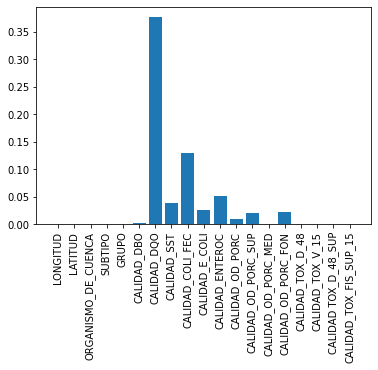

In [8]:
modelos, nombres = get_models()

for m in range(len(modelos)):
  modelos[m].fit(X_cat, np.ravel(Y))
  importance = permutation_importance(modelos[m], X_cat, Y, n_repeats=10)
  print('\033[1m' + nombres[m] + '\033[0m')
  for i,v in enumerate(importance['importances_mean']):
    print(X_cat.columns[i]+':', v.round(3))
  f = plt.figure()
  plt.bar(X_cat.columns, importance['importances_mean'])
  plt.xticks(rotation='vertical')
  plt.show() 

Y donde observamos que las variables de ubicación geográfica, así como organismo de cuenca, subtipo y grupo no tienen una importancia significativa. Mientras que las de calidad, son algunas las que dan la mayor importancia. Pero vemos que CALIDAD_OD_PORC_MED, CALIDAD_TOX_D_48, CALIDAD_TOX_V_15, TOX_D_48_SUP, y CALIDAD_TOX_FIS_SUP_15 no tienen efecto alguno.

### **Selecciona las variables de mayor importancia.**

Removemos de nuestras listas de columnas las variables que no tienen feature importance

In [11]:
num_nom_cal = ['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL','ENTEROC_NMP_100mL','OD_PORC','OD_PORC_SUP',
              'OD_PORC_FON']

cat_nom_cal = ['CALIDAD_DBO','CALIDAD_DQO','CALIDAD_SST','CALIDAD_COLI_FEC','CALIDAD_E_COLI','CALIDAD_ENTEROC','CALIDAD_OD_PORC','CALIDAD_OD_PORC_SUP',
               'CALIDAD_OD_PORC_FON']

Generamos nuevas dataframes con las columnas a utilizar:

In [13]:
X_num = data_asp[num_nom_cal]
X_cat = data_asp[cat_nom_cal]

### **Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)**

* Comenzamos con variables numéricas:

In [17]:
score_list = list()
grid_splits = list()

In [18]:
def get_scores(yreal, ypred, model, aver='micro'):
  temp_list = list()

  temp_list.append(model)
  accu = accuracy_score(yreal,ypred)
  f1 = f1_score(yreal,ypred,average=aver)
  precision = precision_score(yreal,ypred,average=aver)
  recall = recall_score(yreal,ypred,average=aver)

  temp_list.append(accu)
  temp_list.append(f1)
  temp_list.append(precision)
  temp_list.append(recall)
  print('Accuracy:', accu)
  print('f1_score:', f1)
  print('Precision:', precision)
  print('Recall:', recall)

  return temp_list

Sabemos de la parte 1 que las clases de salida tienen diferentes proporciones, por lo que utilizamos el parámetro stratify:

In [19]:
Xtv_num, Xtest_num, ytv_num, ytest_num = train_test_split(X_num, Y, test_size=0.15, stratify=Y, random_state=0) 
print(Xtv_num.shape, ': dimensión de datos de entrada de entrenamiento y validación')
print(Xtest_num.shape, ': dimensión de datos de entrada de prueba')  
print(ytv_num.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest_num.shape, ': dimensión de variable de salida para prueba')

(2957, 9) : dimensión de datos de entrada de entrenamiento y validación
(522, 9) : dimensión de datos de entrada de prueba
(2957, 1) : dimensión de variable de salida para entrenamiento y validación
(522, 1) : dimensión de variable de salida para prueba


* Decision Tree variables numéricas de calidad de entrada:

Comenzamos viendo la curva de aprendizaje para el parámetro de max_depth:

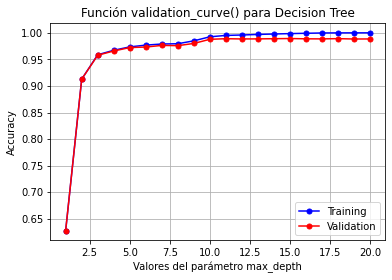

In [20]:
#obtenemos el modelo y los parametros de cross validation
modeloVC = DecisionTreeClassifier()
cvVC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

delta_max_depth = np.linspace(1, 20, 20)

train_scores, valid_scores = validation_curve(modeloVC, 
                                              Xtv_num, 
                                              np.ravel(ytv_num), 
                                              param_name="max_depth", 
                                              param_range=delta_max_depth,
                                              cv=cvVC,
                                              scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_max_depth, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_max_depth, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve() para Decision Tree')
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('Accuracy')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

Y observamos que después de max_depth 10 ya no existen cambios significativos para las curvas de training o validación, asi que nos quedamos con un máximo de 10 para el gridsearch para este parámetro:

In [21]:
#obtenemos el modelo y los parámetros
modeloDTC_iter = DecisionTreeClassifier()
cvSVM = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

dicc_grid = [{'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100],'criterion':['gini','entropy'],
             'max_depth':[1,2,3,4,5,6,7,8,9,10],'min_samples_split':[2,3,4,5,6],'class_weight':['balanced', None]}]

grid1 = GridSearchCV(estimator=modeloDTC_iter, 
                    param_grid=dicc_grid, 
                    cv=cvSVM, 
                    scoring='accuracy',
                    n_jobs=-1,
                    error_score='raise')

Corremos el grid search:

In [22]:
grid1.fit(Xtv_num, np.ravel(ytv_num))

print('Mejor valor de accuracy obtenido con la mejor combinación:', grid1.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid1.best_params_)
print('Métrica utilizada:', grid1.scoring)
print('Mejor Index:',grid1.best_index_)

grid_splits.append(grid1) 

Mejor valor de accuracy obtenido con la mejor combinación: 0.9896289690705935
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0001, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 3}
Métrica utilizada: accuracy
Mejor Index: 46


Observamos un accuracy del 98.96% máximo con los hiper parámetros. Ahora probamos el modelo con sus hiper parámetros para los datos de prueba:

In [23]:
model_DTC_num = DecisionTreeClassifier(**grid1.best_params_)

model_DTC_num.fit(Xtv_num, ytv_num)
#realizamos las predicciones
yhat_num = model_DTC_num.predict(Xtest_num)

score_list.append(get_scores(ytest_num,yhat_num, 'DTC num'))

Accuracy: 0.9885057471264368
f1_score: 0.9885057471264368
Precision: 0.9885057471264368
Recall: 0.9885057471264368


Donde observamos que accuracy disminuye una muy pequeña cantidad. Lo que sugiere un muy mínimo sobreentrenamiento. Es un valor muy aceptable.

* Random Forest variables numéricas de calidad de entrada:

Comenzamos viendo la curva de aprendizaje para el parámetro de max_depth:

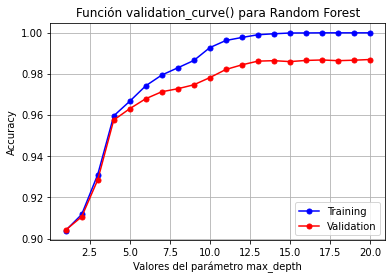

In [24]:
#obtenemos el modelo y los parametros de cross validation
modeloVC = RandomForestClassifier()
cvVC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

delta_max_depth = np.linspace(1, 20, 20)

train_scores, valid_scores = validation_curve(modeloVC, 
                                              Xtv_num, 
                                              np.ravel(ytv_num), 
                                              param_name="max_depth", 
                                              param_range=delta_max_depth,
                                              cv=cvVC,
                                              scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_max_depth, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_max_depth, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve() para Random Forest')
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('Accuracy')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

Y observamos que después de max_depth 10 ya no existen cambios significativos para las curvas de training o validación, así como que previo a 4 la métrica de accuracy aún sigue pudiendo subir. Por lo que nos quedamos con un mínimo de 4 y un máximo de 10 para el gridsearch de este parámetro:

In [25]:
#obtenemos el modelo y los parámetros
modeloRFC_iter = RandomForestClassifier()
cvSVM = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

dicc_grid = [{'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100],'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10],'min_samples_split':[2,3,4,5,6],'class_weight':['balanced', None]}]

grid2 = GridSearchCV(estimator=modeloDTC_iter, 
                    param_grid=dicc_grid, 
                    cv=cvSVM, 
                    scoring='accuracy',
                    n_jobs=-1,
                    error_score='raise')

Corremos el grid search:

In [26]:
grid2.fit(Xtv_num, np.ravel(ytv_num))

print('Mejor valor de accuracy obtenido con la mejor combinación:', grid2.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid2.best_params_)
print('Métrica utilizada:', grid2.scoring)
print('Mejor Index:',grid2.best_index_)

grid_splits.append(grid2)

Mejor valor de accuracy obtenido con la mejor combinación: 0.9897415816832059
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0001, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 3}
Métrica utilizada: accuracy
Mejor Index: 31


Observamos un accuracy del 98.97% máximo con los hiper parámetros. Ahora probamos el modelo con sus hiper parámetros para los datos de prueba:

In [27]:
model_RFC_num = RandomForestClassifier(**grid2.best_params_)

model_RFC_num.fit(Xtv_num, np.ravel(ytv_num))
yhat_num = model_RFC_num.predict(Xtest_num)

score_list.append(get_scores(ytest_num,yhat_num, 'RFC num'))

Accuracy: 0.9846743295019157
f1_score: 0.9846743295019157
Precision: 0.9846743295019157
Recall: 0.9846743295019157


Donde observamos que el accuracy disminuye centésimas con los datos de prueba. Lo cual indica un ligero sobreentrenamiento. Pero muy dentro de valores aceptables.

* Comenzamos con variables categóricas:

Particionamos los datos:

In [28]:
Xtv_cat, Xtest_cat, ytv_cat, ytest_cat = train_test_split(X_cat, Y, test_size=0.15, stratify=Y, random_state=0) 
print(Xtv_cat.shape, ': dimensión de datos de entrada de entrenamiento y validación')
print(Xtest_cat.shape, ': dimensión de datos de entrada de prueba')  
print(ytv_cat.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest_cat.shape, ': dimensión de variable de salida para prueba')

(2957, 9) : dimensión de datos de entrada de entrenamiento y validación
(522, 9) : dimensión de datos de entrada de prueba
(2957, 1) : dimensión de variable de salida para entrenamiento y validación
(522, 1) : dimensión de variable de salida para prueba


* Decision Tree variables categóricas de calidad de entrada:

Comenzamos viendo la curva de aprendizaje para el parámetro de max_depth:

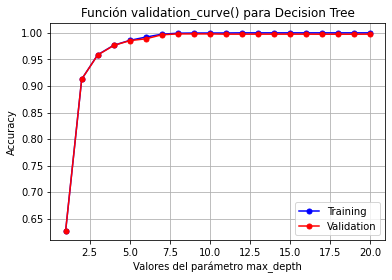

In [29]:
#obtenemos el modelo y los parametros de cross validation
modeloVC = DecisionTreeClassifier()
cvVC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

delta_max_depth = np.linspace(1, 20, 20)

train_scores, valid_scores = validation_curve(modeloVC, 
                                              Xtv_cat, 
                                              np.ravel(ytv_cat), 
                                              param_name="max_depth", 
                                              param_range=delta_max_depth,
                                              cv=cvVC,
                                              scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_max_depth, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_max_depth, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve() para Decision Tree')
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('Accuracy')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

Y observamos que después de max_depth 8 ya no existen cambios significativos para las curvas de training o validación, asi que nos quedamos con un máximo de 10 para el gridsearch para este parámetro:

In [30]:
#obtenemos el modelo y los parámetros
modeloDTC_iter = DecisionTreeClassifier()
cvSVM = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

dicc_grid = [{'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100],'criterion':['gini','entropy'],
             'max_depth':[1,2,3,4,5,6,7,8],'min_samples_split':[2,3,4,5,6],'class_weight':['balanced', None]}]

grid3 = GridSearchCV(estimator=modeloDTC_iter, 
                    param_grid=dicc_grid, 
                    cv=cvSVM, 
                    scoring='accuracy',
                    n_jobs=-1,
                    error_score='raise')

Corremos el grid search:

In [31]:
grid3.fit(Xtv_cat, np.ravel(ytv_cat))

print('Mejor valor de accuracy obtenido con la mejor combinación:', grid3.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid3.best_params_)
print('Métrica utilizada:', grid3.scoring)
print('Mejor Index:',grid3.best_index_)

grid_splits.append(grid3)

Mejor valor de accuracy obtenido con la mejor combinación: 0.9979708769683387
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2}
Métrica utilizada: accuracy
Mejor Index: 285


Observamos un accuracy del 99.79% máximo con los hiper parámetros. Ahora probamos el modelo con sus hiper parámetros para los datos de prueba:

In [32]:
model_DTC_cat = DecisionTreeClassifier(**grid3.best_params_)

model_DTC_cat.fit(Xtv_cat, np.ravel(ytv_cat))
yhat_cat = model_DTC_cat.predict(Xtest_cat)

score_list.append(get_scores(ytest_cat,yhat_cat, 'DTC cat'))

Accuracy: 0.9961685823754789
f1_score: 0.9961685823754789
Precision: 0.9961685823754789
Recall: 0.9961685823754789


Donde observamos que el accuracy disminuye centésimas con los datos de prueba. Lo cual indica un ligero sobreentrenamiento. Pero muy dentro de valores aceptables.

* Random Forest variables categóricas de calidad de entrada:

Comenzamos viendo la curva de aprendizaje para el parámetro de max_depth:

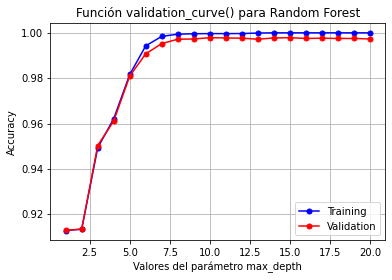

In [33]:
#obtenemos el modelo y los parametros de cross validation
modeloVC = RandomForestClassifier()
cvVC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

delta_max_depth = np.linspace(1, 20, 20)

train_scores, valid_scores = validation_curve(modeloVC, 
                                              Xtv_cat, 
                                              np.ravel(ytv_cat), 
                                              param_name="max_depth", 
                                              param_range=delta_max_depth,
                                              cv=cvVC,
                                              scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_max_depth, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_max_depth, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve() para Random Forest')
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('Accuracy')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

Y observamos que después de max_depth 8 ya no existen cambios significativos para las curvas de training o validación, así como que previo a 4 la métrica de accuracy aún sigue pudiendo subir. Por lo que nos quedamos con un mínimo de 4 y un máximo de 10 para el gridsearch de este parámetro:

In [34]:
#obtenemos el modelo y los parámetros
modeloRFC_iter = RandomForestClassifier()
cvSVM = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

dicc_grid = [{'ccp_alpha':[0.0001,0.01,0.1,1.0,10.,100],'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8],'min_samples_split':[2,3,4,5,6],'class_weight':['balanced', None]}]

grid4 = GridSearchCV(estimator=modeloDTC_iter, 
                    param_grid=dicc_grid, 
                    cv=cvSVM, 
                    scoring='accuracy',
                    n_jobs=-1,
                    error_score='raise')

Corremos el grid search:

In [35]:
grid4.fit(Xtv_cat, np.ravel(ytv_cat))

print('Mejor valor de accuracy obtenido con la mejor combinación:', grid4.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid4.best_params_)
print('Métrica utilizada:', grid4.scoring)
print('Mejor Index:',grid4.best_index_)

grid_splits.append(grid4)

Mejor valor de accuracy obtenido con la mejor combinación: 0.9979708769683387
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2}
Métrica utilizada: accuracy
Mejor Index: 195


Observamos un accuracy del 99.79% máximo con los hiper parámetros. Ahora probamos el modelo con sus hiper parámetros para los datos de prueba:

In [36]:
model_RFC_cat = RandomForestClassifier(**grid4.best_params_)

model_RFC_cat.fit(Xtv_cat, np.ravel(ytv_cat))
#realizamos las predicciones
yhat_cat = model_RFC_cat.predict(Xtest_cat)

score_list.append(get_scores(ytest_cat,yhat_cat, 'RFC cat'))

Accuracy: 0.9885057471264368
f1_score: 0.9885057471264368
Precision: 0.9885057471264368
Recall: 0.9885057471264368


Donde observamos que el accuracy disminuye cerca de 1% con los datos de prueba. Lo cual indica un ligero sobreentrenamiento. Pero muy dentro de valores aceptables.

### **Explora que clasificador es el más optimo, ejemplo:**

Obtenemos los resultados de cada split del cross validation hecho en cada gridsearch:

In [37]:
tot_resultados_cv = list()
for grid in grid_splits:
  indx = grid.best_index_
  resultados_cv = list()
  for i in range(15):
    resultados_cv.append(grid.cv_results_['split' + str(i) + '_test_score'][indx])
  tot_resultados_cv.append(resultados_cv)

Generamos una lista con los nombres de cada modelo:

In [38]:
scores = list()
for scor in score_list:
  scores.append(scor[0])

Visualizamos en boxplots la distribución de los resultados de accuracy para cada modelo:

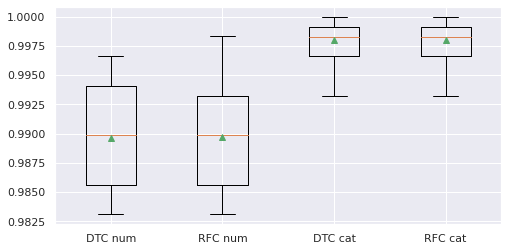

In [39]:
sns.set(rc={'figure.figsize':(8,4)})
plt.boxplot(tot_resultados_cv, labels=scores, showmeans=True)
plt.show()

Donde observamos que los resultados con menos varianza para cada split, son los de los modelos categóricos. Así mismo, el promedio más alto es también para los categóricos. Por lo que nos quedamos con el modelo de Decision Tree con variables categóricas de calidad, ya que entre los dos modelos con variables categóricas, es el que arroja mejores resultados para los datos de prueba:

In [47]:
best_RFC_model = DecisionTreeClassifier(**grid3.best_params_)

best_RFC_model.fit(Xtv_cat, np.ravel(ytv_cat))
yhat = best_RFC_model.predict(Xtest_cat)

print('Accuracy:',accuracy_score(ytest_cat,yhat))
print('F1-score:',f1_score(ytest_cat,yhat,average='micro'))
print('Precision:',precision_score(ytest_cat,yhat,average='micro'))
print('Recall:',recall_score(ytest_cat,yhat,average='micro'))

Accuracy: 0.9961685823754789
F1-score: 0.9961685823754789
Precision: 0.9961685823754789
Recall: 0.9961685823754789


Un 99.62% en sus métricas.

### **Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.**

* Reporte de clasificacion:

In [48]:
target_names = ['Verde', 'Amarillo', 'Rojo']
print(classification_report(ytest_cat, yhat, target_names=target_names))

              precision    recall  f1-score   support

       Verde       0.99      1.00      1.00       189
    Amarillo       0.99      1.00      1.00       169
        Rojo       1.00      0.99      0.99       164

    accuracy                           1.00       522
   macro avg       1.00      1.00      1.00       522
weighted avg       1.00      1.00      1.00       522



Validamos que tenemos un 100% de accuracy. Pero que para precision, recall, y f1-score obtenemos 99% en algunas clases.

* Grafica de Precision-Recall

Aplicamos one-hot encoder a los datos de Y de prueba, así como a las predicciones. Ya que es necesario hacer una curva para cada clase

In [49]:
Y_ohe = OneHotEncoder()
Y_fitted = Y_ohe.fit(Y)
y_test_multicolum = Y_fitted.transform(ytest_cat).toarray()
y_hat_multicolum = Y_fitted.transform(pd.DataFrame(yhat,columns=['SEMAFORO'])).toarray()

Generamos las curvas de precision vs. recall de cada clase:

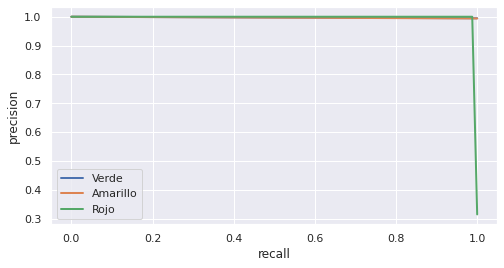

In [50]:
precision = dict()
recall = dict()
clases = ['Verde','Amarillo','Rojo']
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test_multicolum[:, i],
                                                        y_hat_multicolum[:, i])
    plt.plot(recall[i], precision[i], lw=2, label=clases[i])
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.show()

Observamos una exactitud cercana al 99% para cada clase con los datos de prueba.

Generamos como complemento una curva de ROC para cada clase:

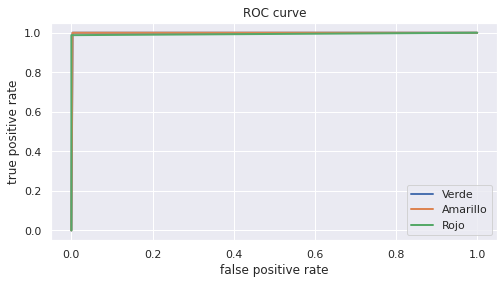

In [51]:
fpr = dict()
tpr = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_multicolum[:, i],
                                  y_hat_multicolum[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label=clases[i])

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

Donde igual obtenemos un 99% de area bajo la curva.

### **Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.**

Generamos la matriz de confusión:

In [52]:
cm = confusion_matrix(ytest_cat, yhat)

La visualizamos:

[Text(21.499999999999996, 0.5, 'Etiquetas Reales'),
 Text(0.5, 21.5, 'Etiquetas de Predicción')]

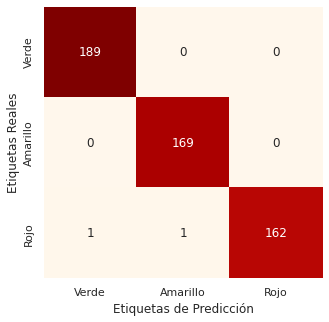

In [58]:
df_cm = pd.DataFrame(cm, index = ['Verde','Amarillo','Rojo'], columns = ['Verde','Amarillo','Rojo'])
plt.figure(figsize = (5,5))
ax = sns.heatmap(df_cm, annot=True, fmt='d', cmap='OrRd', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")

Y encontramos que el modelo consiguió predecir con un 99% de exactitud los datos de prueba. Tuvo únicamente 2 predicciones erróneas.